In [1]:
# <!-- collapse=True -->
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Courbe de Hilbert

La [courbe de Hilbert](https://fr.wikipedia.org/wiki/Courbe_de_Hilbert) est une façon de replier une ligne afin qu'elle parcours entièrement une surface, tout en respectant au mieux la localité. C'est-à-dire que deux points de la surface proche correspondent à deux points proche sur la ligne "depliée".


Cette propriétée permet de créer des visualisation de donnée linéraire plus compacte, comme par exemple le contenu d'un fichier informatique, voir [Corte.si](https://corte.si/posts/visualisation/binvis/index.html).

## Generation avec un L-systeme

Un algorithme, plutôt élégant, utilise le remplacement succesif d'un motif dans une chaine de caractère. Les
[L-Systèmes](https://fr.wikipedia.org/wiki/L-Syst%C3%A8me) permetent de générer des motifs fractales, et sont utilisés pour modéliser les plantes ou d'autres systèmes biologiques. On obtient alors une série d'instruction de dessin (par exmple: avancer de 1cm, tourner de 4°, avancer de 4cm...etc). Un programme "type tortue" permet ensuite de tracer le motif final.

Pour la courbe de Hilbert le L-système est (cf [wikipedia](https://fr.wikipedia.org/wiki/Courbe_de_Hilbert)):

    Alphabet : L, R
    Constantes : F, +, −
    Axiome : L
    Règles :
        L → –RF+LFL+FR−
        R → +LF−RFR−FL+ 
   
**F** signifie « avance », **+** signifie « tourner à gauche », et **−** signifie « tourner à droite ». L'axiome est l'état initial. Les constantes codent une instruction de dessin, alors que les symboles de l'alphabet sont utilisés pour indiquer les remplacements de motif.

Un schéma permet de mieux comprendre le mécanisme:
![schema L-system](images/hilbert_Lsystem.png)

La flèche verte represente la position et la direction de départ. L'orientation du motif inséré dépend donc de l'état precédent. Les deux premier schémas (L et R) correspondent aux deux règles de remplacement. Les petites lettres _L_ et _R_ indiquent le lieux des prochaines insertion de motifs. Les trois schémas en bas illustrent la realisation de la première itération. 

Le programme permettant de générer les instructions est beaucoup plus simple que précédement:

In [42]:
n_level = 3

code = 'L'
for k in range(n_level):
    code = code.replace('R', 'b') # buffer
    code = code.replace('L', '-RF+LFL+FR-')
    code = code.replace('b', '+LF-RFR-FL+')

print( len(code) )
print( code )

211
-+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+F+-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-F-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-+F+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+-


Il faut maintenant dessiner le motif correspondant au code. Pour cela on parcours le code lettre par lettre, en executant chaque instruction et en enregistrant les coordonnées obtenues.

In [43]:
def integre( code ):
    coords = [ np.array([0, 0]) ]
    direction = np.array( [0, 1] )
    
    for lettre in code:
        if lettre == 'F':
            new_coord = coords[-1] + direction
            coords.append( new_coord  )
        elif lettre in '+-':
            direction = tourne( direction, lettre )
            
    return np.array( coords )

# effectue la rotation :
def tourne( direction, sens ):
    new_dir = np.array( [ -direction[1] , direction[0] ] )
    if sens == '-':
        direction = new_dir
    elif sens == '+':
        direction = - new_dir
    return direction

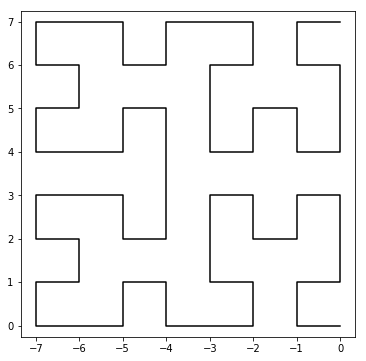

In [44]:
c = integre( code )

plt.figure( figsize=(6, 6) )
plt.plot( c[:, 0], c[:, 1], 'k' )
plt.axis('equal');

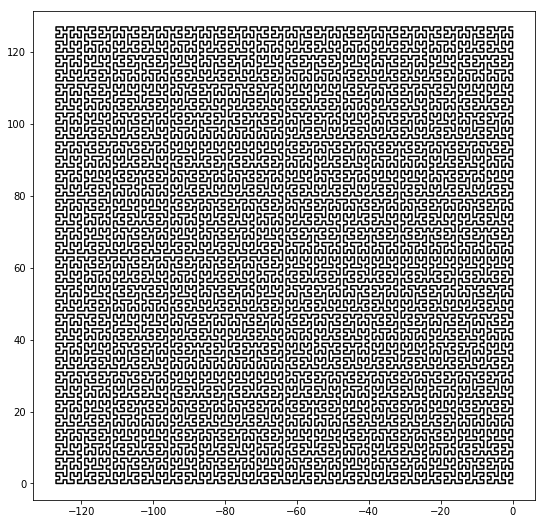

In [40]:
n_level = 7

code = 'L'
for k in range(n_level):
    code = code.replace('R', 'b') # buffer
    code = code.replace('L', '-RF+LFL+FR-')
    code = code.replace('b', '+LF-RFR-FL+')

c = integre( code )

plt.figure( figsize=(9, 9) )
plt.plot( c[:, 0], c[:, 1], 'k' )
plt.axis('equal');